In [325]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=40)

[]

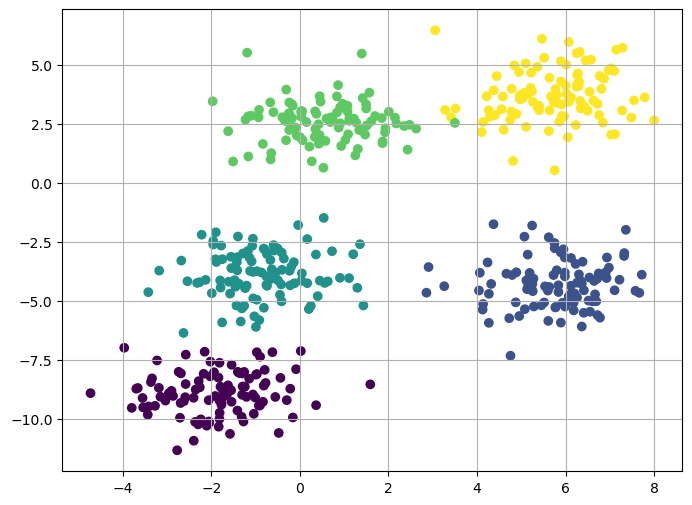

In [327]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.grid(True)
plt.plot()

In [328]:
# random number generator between -10 and 10
10*(2*np.random.random(X.shape[1])-1)

array([-5.9891921,  1.244697 ])

In [329]:
k = 5
colors = ['green','yellow','blue','cyan','red']
clusters ={}
# defining random centres for plotting
for idx in range(k):
    center = 10*(2*np.random.random(X.shape[1])-1)
    cluster = {
        'center':center,
        'points':[],
        'color':colors[idx]

    }
    clusters[idx] = cluster

In [330]:
# clusters

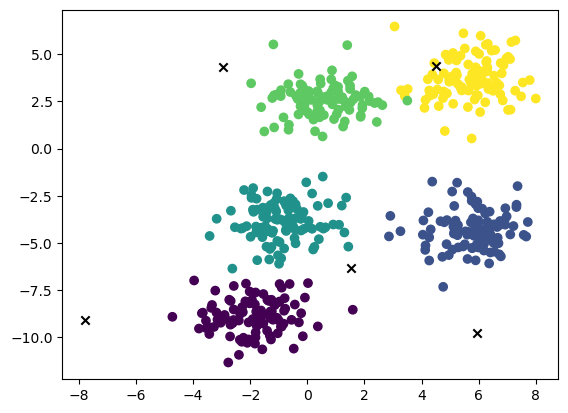

In [331]:
plt.scatter(X[:,0],X[:,1], c = Y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker='x',c="black")

plt.show()

In [332]:
# function to find the distance between two points
def distance(v1,v2):
    return np.array(np.sqrt(np.sum((v2-v1)**2)))

In [333]:
# checking distance function
v1 = np.array([1,1])
v2 = np.array([2,2])

distance(v1,v2)

array(1.41421356)

In [334]:
# implementing E-step

def assign_clusters():
    for idx in range(X.shape[0]):

        dist = []
        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]["center"])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)              #argmin gives minimum index present in the array
        # lets assign this point to its respective cluster

        clusters[curr_cluster]['points'].append(curr_x)  

In [335]:
assign_clusters()

In [336]:
# updating the cluster

def update_cluster():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[idx]["center"] = new_center

            clusters[idx]["points"] = []
        

In [337]:
# function for plotting

def plot_clusters(iteration):
    plt.figure(figsize=(6, 6))
    for idx in clusters:
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            plt.scatter(pts[:,0], pts[:,1], c=clusters[idx]['color'])
        plt.scatter(clusters[idx]['center'][0], clusters[idx]['center'][1], c='black', marker='x')
    plt.title(f'Iteration {iteration}')
    plt.grid(True)
    plt.show()

In [338]:
def run_model(iterations):
    for i in range(iterations):
        print(f"Iteration {i+1}/{iterations}")
        update_cluster()
        assign_clusters()
        plot_clusters(iterations)

Iteration 1/5


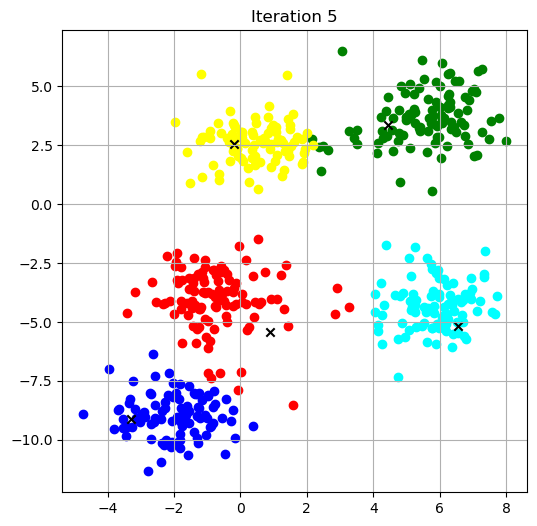

Iteration 2/5


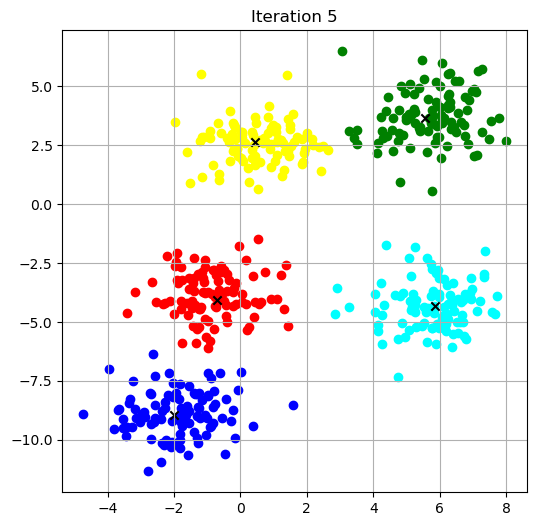

Iteration 3/5


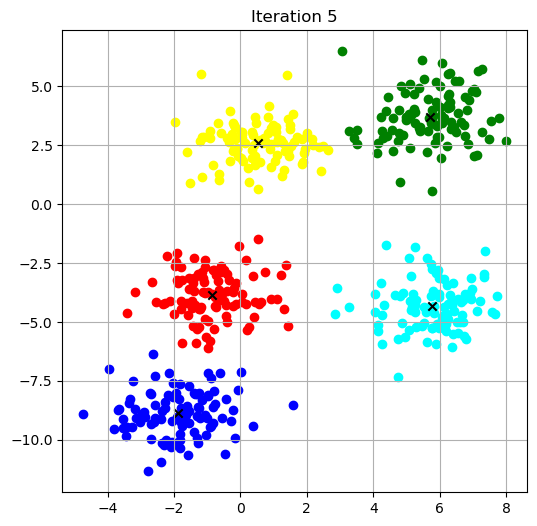

Iteration 4/5


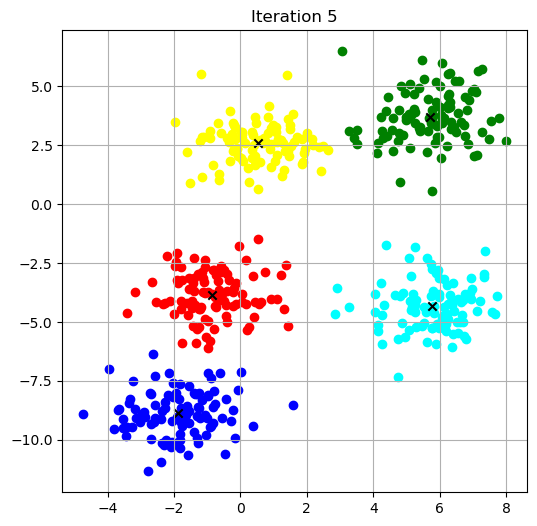

Iteration 5/5


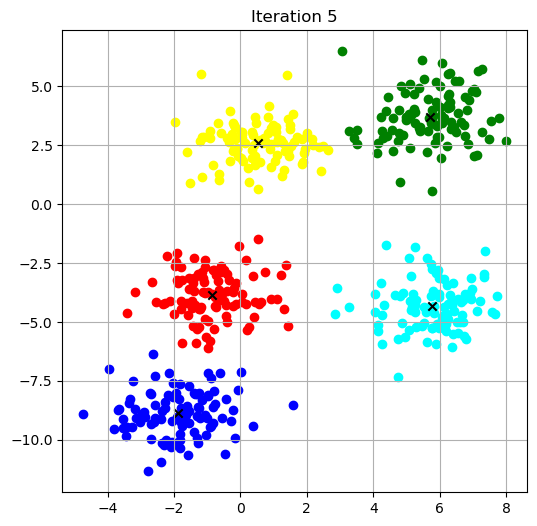

In [339]:
run_model(5)

### Optimal clustering using K-means(sklearn)

In [340]:
from sklearn.cluster import KMeans

In [341]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=40)

In [342]:
km = KMeans(5)

In [343]:
km.fit(X,Y)

c:\Users\Sundram\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sundram\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [344]:
center = km.cluster_centers_
label = km.labels_

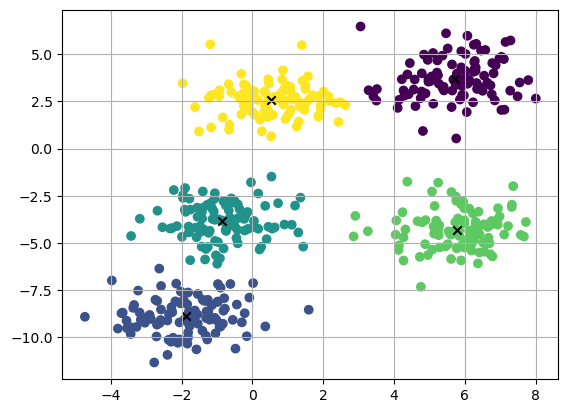

In [346]:
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(center[:,0],center[:,1],c="black",marker='x')
plt.grid(True)
plt.show()